In [1]:
import networkx as nx
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allowing the plot in line for seaborn
%matplotlib inline
plt.style.use('seaborn')

# enabling outlines line in histogram
plt.rcParams["patch.force_edgecolor"] = True

from networkx.algorithms.community.quality import coverage, modularity
from analysis.analysis_utils import create_graph_df
from analysis.analysis_utils import extract_community
from analysis_utils import compute_degree, compute_betweenness
from analysis.analysis_utils import community_pie_chart
from analysis.analysis_utils import plot_sentiment_distribution1
from analysis.analysis_utils import plot_sentiment_distribution2
from analysis_utils import plot_degree_distribution

# s1

### Load graph and read basic information

In [2]:
vax_g_s1 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/sin1/Final_Graph_sentiment_Vax.gml')
vax_dig_s1 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/sin1/Final_DiGraph_sentiment_Vax.gml')

In [40]:
print(nx.info(vax_g_s1))
print('-------------------------------------------')
print(nx.info(vax_dig_s1))

Name: Final vax Graph
Type: Graph
Number of nodes: 29748
Number of edges: 36760
Average degree:   2.4714
-------------------------------------------
Name: Final vax Direct Graph
Type: DiGraph
Number of nodes: 29748
Number of edges: 37022
Average in degree:   1.2445
Average out degree:   1.2445


In [3]:
vax_df_s1 = create_graph_df(vax_g_s1)

  0%|          | 0/29748 [00:00<?, ?it/s]

### Centrality

In [42]:
comm_0_s1 = extract_community(vax_dig_s1, 0, 'sentimentComm')
comm_1_s1 = extract_community(vax_dig_s1, 1, 'sentimentComm')

In [43]:
compute_degree(comm_0_s1, 1)
compute_degree(comm_1_s1, 1)

Name: 
Type: MultiDiGraph
Number of nodes: 12722
Number of edges: 21018
Average in degree:   1.6521
Average out degree:   1.6521
Name: 
Type: MultiDiGraph
Number of nodes: 12722
Number of edges: 21018
Average in degree:   1.6521
Average out degree:   1.6521
degree: [('dzrhnews', 0.019888373555538085), ('iggilmaya', 0.011398474962660167), ('roshfond', 0.009590441003065796), ('pulutinti', 0.009354610486596965), ('sobri', 0.00817545790425281), ('arifakib1', 0.007861017215627703), ('sosninosename1', 0.007703796871315148), ('jsaholmes', 0.00738935618269004), ('alexislao11', 0.006839084977596101), ('cnnphilippines', 0.006210203600345885)]
Name: 
Type: MultiDiGraph
Number of nodes: 15320
Number of edges: 25234
Average in degree:   1.6471
Average out degree:   1.6471
Name: 
Type: MultiDiGraph
Number of nodes: 15320
Number of edges: 25234
Average in degree:   1.6471
Average out degree:   1.6471
degree: [('cvaccinebot', 0.042757360141001365), ('ce_chinaeconomy', 0.012141784711795807), ('poandpo'

In [44]:
compute_betweenness(comm_0_s1)
compute_betweenness(comm_1_s1)

between: [('zaldytor', 0.0010431603151294243), ('roshfond', 0.0010158256271239733), ('sofiacclvi', 0.0008297689368962818), ('steve24940349', 0.0005976723518171827), ('isabelmerana', 0.0005836652253486742), ('tripperhead', 0.0005533006307944971), ('ghows', 0.0005478521934991661), ('pulutinti', 0.0005329141976983645), ('dunlukmyname', 0.0004682506140458528), ('mertinsantos', 0.0004058856295041351)]
between: [('dogphoenixwp', 1.420516438808585e-07), ('nsaillant', 4.971807535830048e-08), ('cassiecassycc', 4.261549316425755e-08), ('mrbrown', 4.261549316425755e-08), ('thehill', 3.5512910970214626e-08), ('segacs', 3.5512910970214626e-08), ('filipinanswers', 3.5512910970214626e-08), ('betexjade', 3.5512910970214626e-08), ('adamsafone', 2.8410328776171702e-08), ('troobie_md', 2.8410328776171702e-08)]


### Member in Community

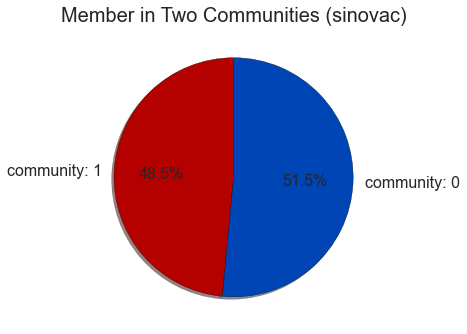

In [9]:
community_pie_chart(vax_g_s1, 'sentimentComm', 'Member in Two Communities (sinovac)')

D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

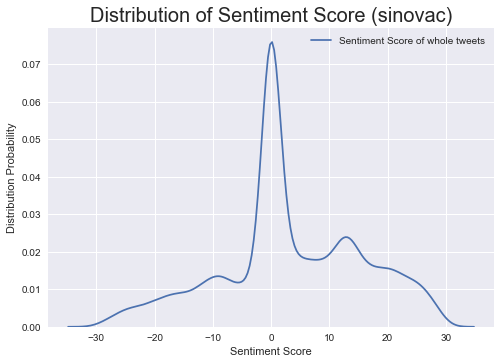

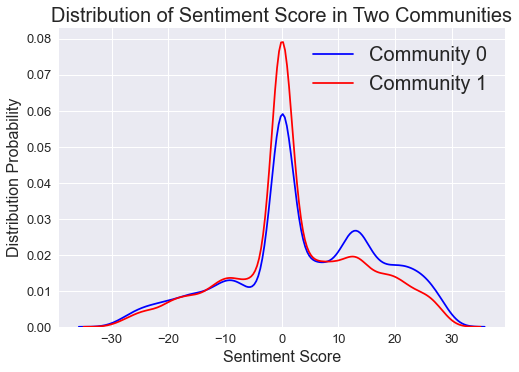

In [10]:
plot_sentiment_distribution1(vax_g_s1, 'Distribution of Sentiment Score (sinovac)', vax_df_s1)
plot_sentiment_distribution2(vax_g_s1, 'Distribution of Sentiment Score (sinovac)', vax_df_s1)

### Degree

  0%|          | 0/29748 [00:00<?, ?it/s]

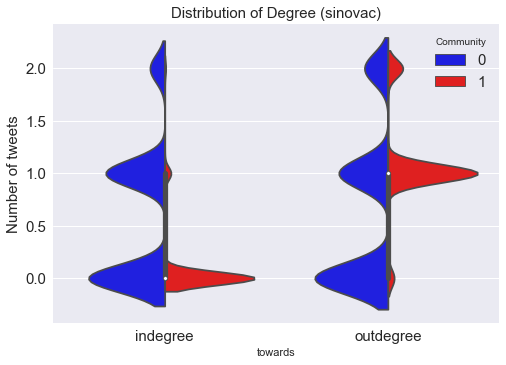

,degree_value,community,towards,placeholder
1,0.0,1,indegree,
2,0.0,1,outdegree,
4,2.0,1,outdegree,
5,0.0,1,indegree,
7,0.0,0,indegree,
...,...,...,...,...
59491,0.0,1,indegree,
59492,1.0,1,outdegree,
59493,0.0,1,indegree,
59494,1.0,1,outdegree,


In [4]:
plot_degree_distribution(vax_dig_s1, 'Distribution of Degree (sinovac)', 0)

In [13]:
vax_df_s1.to_csv('vax_df_reply_s1.csv')

# s2

In [5]:
vax_g_s2 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/sin2/Final_Graph_sentiment_Vax.gml')
vax_dig_s2 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/sin2/Final_DiGraph_sentiment_Vax.gml')

print(nx.info(vax_g_s2))
print('-------------------------------------------')
print(nx.info(vax_dig_s2))

Name: Final vax Graph
Type: Graph
Number of nodes: 5350
Number of edges: 5859
Average degree:   2.1903
-------------------------------------------
Name: Final vax Direct Graph
Type: DiGraph
Number of nodes: 5350
Number of edges: 5907
Average in degree:   1.1041
Average out degree:   1.1041


In [6]:
vax_df_s2 = create_graph_df(vax_g_s2)


  0%|          | 0/5350 [00:00<?, ?it/s]

In [23]:
comm_0_s2 = extract_community(vax_dig_s2, 0, 'sentimentComm')
comm_1_s2 = extract_community(vax_dig_s2, 1, 'sentimentComm')

compute_degree(comm_0_s2, 1)
compute_degree(comm_1_s2, 1)

Name: 
Type: MultiDiGraph
Number of nodes: 2755
Number of edges: 4016
Average in degree:   1.4577
Average out degree:   1.4577
Name: 
Type: MultiDiGraph
Number of nodes: 2755
Number of edges: 4016
Average in degree:   1.4577
Average out degree:   1.4577
degree: [('cvaccinebot', 0.09222948438634714), ('bridgebeijing', 0.012345679012345678), ('gbafreview', 0.011982570806100218), ('codebluenews', 0.008351488743645606), ('pdchina', 0.007625272331154684), ('stigmabasea', 0.006172839506172839), ('nst_online', 0.005809731299927378), ('ptvph', 0.005809731299927378), ('poandpo', 0.005809731299927378), ('ce_chinaeconomy', 0.0054466230936819175)]
Name: 
Type: MultiDiGraph
Number of nodes: 2130
Number of edges: 2782
Average in degree:   1.3061
Average out degree:   1.3061
Name: 
Type: MultiDiGraph
Number of nodes: 2130
Number of edges: 2782
Average in degree:   1.3061
Average out degree:   1.3061
degree: [('logosaetos', 0.04274307186472522), ('frankdelia7', 0.023485204321277597), ('vsalvatordali',

In [28]:
compute_betweenness(comm_0_s2)
compute_betweenness(comm_1_s2)

between: [('clipperchip', 2.637909235346612e-06), ('goldencaskcap', 6.59477308836653e-07), ('melatinungsari', 6.59477308836653e-07), ('infoseepage', 6.59477308836653e-07), ('fmtoday', 6.59477308836653e-07), ('cleavon_md', 4.396515392244353e-07), ('malaysia_covid', 4.396515392244353e-07), ('delcck1', 4.396515392244353e-07), ('onenewsph', 4.396515392244353e-07), ('robbiemeriales', 4.396515392244353e-07)]
between: [('kjoules', 0.00011125578492913774), ('njstone9', 6.591099953485665e-05), ('transit_jam', 6.0707499571578495e-05), ('mertinsantos', 4.162799970622525e-05), ('heartofemmaus', 3.245992834235422e-05), ('chefmiew', 3.097321406713188e-05), ('stephiekeachie', 2.874314265429839e-05), ('white_bite', 2.874314265429839e-05), ('mdsynic', 2.2548499840872012e-05), ('durianliftoff', 2.2548499840872012e-05)]


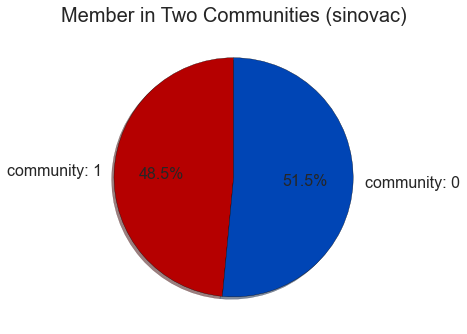

In [24]:
community_pie_chart(vax_g_s2, 'sentimentComm', 'Member in Two Communities (sinovac)')

D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

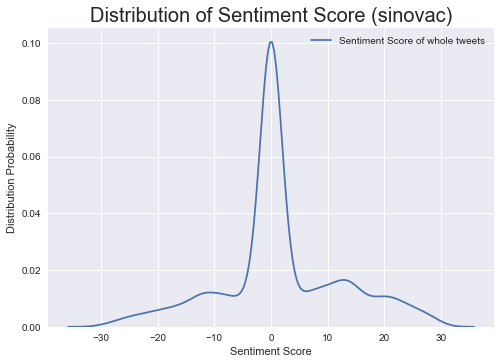

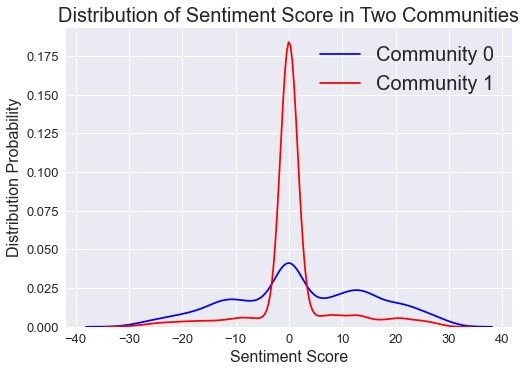

In [25]:
plot_sentiment_distribution1(vax_g_s2, 'Distribution of Sentiment Score (sinovac)', vax_df_s2)
plot_sentiment_distribution2(vax_g_s2, 'Distribution of Sentiment Score (sinovac)', vax_df_s2)

  0%|          | 0/5350 [00:00<?, ?it/s]

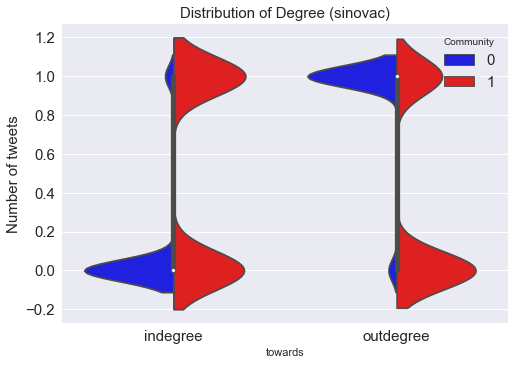

,degree_value,community,towards,placeholder
1,0.0,0,indegree,
2,0.0,0,outdegree,
5,1.0,1,indegree,
10,0.0,1,outdegree,
12,0.0,1,outdegree,
...,...,...,...,...
10695,0.0,0,indegree,
10696,1.0,0,outdegree,
10697,0.0,0,indegree,
10698,1.0,1,outdegree,


In [7]:
plot_degree_distribution(vax_dig_s2, 'Distribution of Degree (sinovac)', 0)

In [27]:
vax_df_s2.to_csv('vax_df_reply_s2.csv')

# v1

In [2]:
vax_g_v1 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/v1/Final_Graph_sentiment_Vax.gml')
vax_dig_v1 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/v1/Final_DiGraph_sentiment_Vax.gml')

print(nx.info(vax_g_v1))
print('-------------------------------------------')
print(nx.info(vax_dig_v1))

Name: Final vax Graph
Type: Graph
Number of nodes: 47923
Number of edges: 49939
Average degree:   2.0841
-------------------------------------------
Name: Final vax Direct Graph
Type: DiGraph
Number of nodes: 47923
Number of edges: 49946
Average in degree:   1.0422
Average out degree:   1.0422


In [3]:
vax_df_v1 = create_graph_df(vax_g_v1)


  0%|          | 0/47923 [00:00<?, ?it/s]

In [4]:
comm_0_v1 = extract_community(vax_dig_v1, 0, 'sentimentComm')
comm_1_v1 = extract_community(vax_dig_v1, 1, 'sentimentComm')

compute_degree(comm_0_v1, 1)
compute_degree(comm_1_v1, 1)

Name: 
Type: MultiDiGraph
Number of nodes: 6303
Number of edges: 8233
Average in degree:   1.3062
Average out degree:   1.3062
Name: 
Type: MultiDiGraph
Number of nodes: 6303
Number of edges: 8233
Average in degree:   1.3062
Average out degree:   1.3062
degree: [('jenniferclmn', 0.03046651856553475), ('jlay02', 0.02284988892415106), ('joyj69957841', 0.021263091082196126), ('ishdeep_kohli', 0.01808949539828626), ('newindianxpress', 0.017137416693113295), ('teelin', 0.016026658203744843), ('sureshseshadri1', 0.015233259282767374), ('mohammedafter', 0.014915899714376388), ('blesamerica', 0.014598540145985401), ('jayraj2008', 0.011107584893684543)]
Name: 
Type: MultiDiGraph
Number of nodes: 24681
Number of edges: 43729
Average in degree:   1.7718
Average out degree:   1.7718
Name: 
Type: MultiDiGraph
Number of nodes: 24681
Number of edges: 43729
Average in degree:   1.7718
Average out degree:   1.7718
degree: [('latestly', 0.006037277147487844), ('abscbnnews', 0.005510534846029173), ('peni

In [5]:
compute_betweenness(comm_0_v1)
compute_betweenness(comm_1_v1)

between: [('newindianxpress', 4.1657942130703415e-07), ('sureshseshadri1', 2.4069033231073087e-07), ('chris_f_carson', 2.345187853284044e-07), ('covidindiaseva', 1.558315613037424e-07), ('iyer_rn', 1.2034516615536543e-07), ('houseofgab', 7.405856378791719e-08), ('bogochisaac', 6.480124331442753e-08), ('doritmi', 5.554392284093789e-08), ('laurie_garrett', 5.554392284093789e-08), ('bobpfalzgraf', 4.9372375858611455e-08)]
between: [('ancalerts', 1.915541974531049e-08), ('abscbnnews', 1.915541974531049e-08), ('news12nj', 8.209465605133066e-09), ('news24', 8.209465605133066e-09), ('govmurphy', 5.472977070088711e-09), ('jackposobiec', 5.472977070088711e-09), ('juniornightmb', 5.472977070088711e-09), ('govmikedewine', 5.472977070088711e-09), ('biancadava', 4.104732802566533e-09), ('_katrinadomingo', 4.104732802566533e-09)]


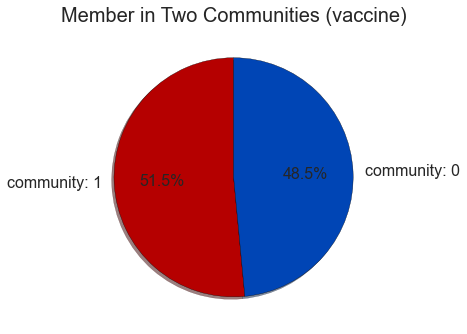

In [6]:
community_pie_chart(vax_g_v1, 'sentimentComm', 'Member in Two Communities (vaccine)')

D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

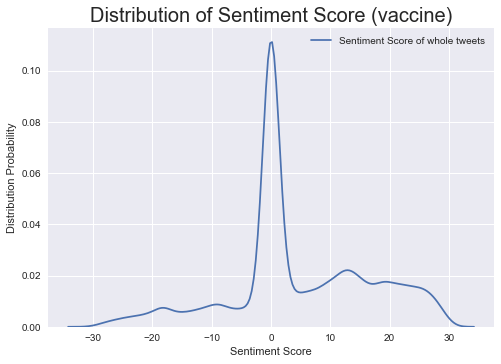

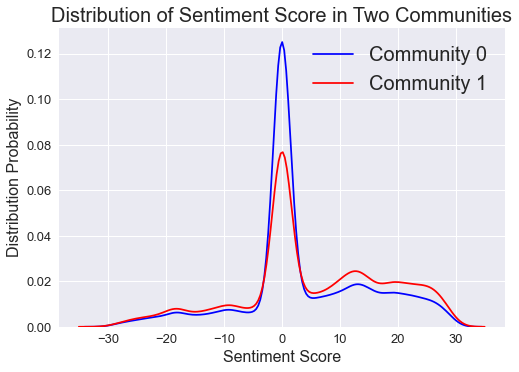

In [7]:
plot_sentiment_distribution1(vax_g_v1, 'Distribution of Sentiment Score (vaccine)', vax_df_v1)
plot_sentiment_distribution2(vax_g_v1, 'Distribution of Sentiment Score (vaccine)', vax_df_v1)

  0%|          | 0/47923 [00:00<?, ?it/s]

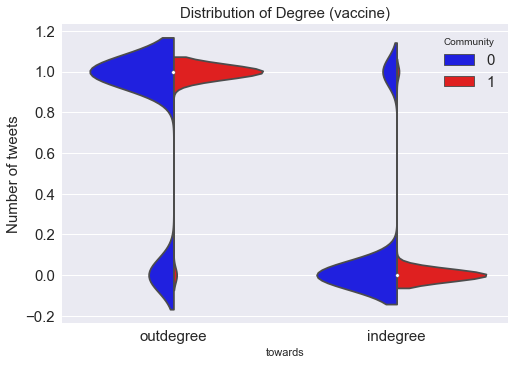

,degree_value,community,towards,placeholder
0,1.0,1,outdegree,
1,0.0,1,indegree,
2,0.0,1,outdegree,
5,0.0,1,indegree,
7,0.0,0,indegree,
...,...,...,...,...
95841,0.0,1,indegree,
95842,1.0,1,outdegree,
95843,0.0,1,indegree,
95844,1.0,1,outdegree,


In [8]:
plot_degree_distribution(vax_dig_v1, 'Distribution of Degree (vaccine)', 0)

In [9]:
vax_df_v1.to_csv('vax_df_reply_v1.csv')

# v2

In [12]:
vax_g_v2 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/v2/Final_Graph_sentiment_Vax.gml')
vax_dig_v2 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/v2/Final_DiGraph_sentiment_Vax.gml')

print(nx.info(vax_g_v2))
print('-------------------------------------------')
print(nx.info(vax_dig_v2))

Name: Final vax Graph
Type: Graph
Number of nodes: 25043
Number of edges: 25793
Average degree:   2.0599
-------------------------------------------
Name: Final vax Direct Graph
Type: DiGraph
Number of nodes: 25043
Number of edges: 25796
Average in degree:   1.0301
Average out degree:   1.0301


In [13]:
vax_df_v2 = create_graph_df(vax_g_v2)


  0%|          | 0/25043 [00:00<?, ?it/s]

In [14]:
comm_0_v2 = extract_community(vax_dig_v2, 0, 'sentimentComm')
comm_1_v2 = extract_community(vax_dig_v2, 1, 'sentimentComm')

compute_degree(comm_0_v2, 1)
compute_degree(comm_1_v2, 1)

Name: 
Type: MultiDiGraph
Number of nodes: 4183
Number of edges: 5635
Average in degree:   1.3471
Average out degree:   1.3471
Name: 
Type: MultiDiGraph
Number of nodes: 4183
Number of edges: 5635
Average in degree:   1.3471
Average out degree:   1.3471
degree: [('chris_f_carson', 0.18938307030129126), ('thegod_particle', 0.035150645624103305), ('diego48979433', 0.03443328550932569), ('springcanadian1', 0.03371592539454806), ('randolf828', 0.024629363940698232), ('iwpchi', 0.023672883787661407), ('mrchingone', 0.021520803443328552), ('drdeblk', 0.01602104256336681), ('nreveillee', 0.011956001912960307), ('giddy_bunny', 0.0117168818747011)]
Name: 
Type: MultiDiGraph
Number of nodes: 12897
Number of edges: 30444
Average in degree:   2.3605
Average out degree:   2.3605
Name: 
Type: MultiDiGraph
Number of nodes: 12897
Number of edges: 30444
Average in degree:   2.3605
Average out degree:   2.3605
degree: [('vaxtoronto', 0.23379342431761788), ('vaxpeel', 0.08475496277915633), ('vaxottawa', 

In [15]:
compute_betweenness(comm_0_v2)
compute_betweenness(comm_1_v2)

between: [('tmprowell', 5.085547831186674e-07), ('who', 5.085547831186674e-07), ('thegod_particle', 4.859523483133933e-07), ('mrchingone', 2.9383165246856337e-07), ('cllrmajid', 6.780730441582231e-08), ('drbrucescott', 6.780730441582231e-08), ('littlebytesnews', 6.780730441582231e-08), ('randolf828', 6.780730441582231e-08), ('oscarswild1', 6.780730441582231e-08), ('culladgh', 6.780730441582231e-08)]
between: [('drnighatarif', 5.011336987305152e-08), ('sabcnews', 2.0045347949220607e-08), ('teddybird', 1.5034010961915454e-08), ('mirrornow', 1.0022673974610303e-08), ('hseimm', 1.0022673974610303e-08), ('jillwallis1', 1.0022673974610303e-08), ('airfinity', 1.0022673974610303e-08), ('mancitycouncil', 1.0022673974610303e-08), ('tgagovau', 1.0022673974610303e-08), ('saudi_gazette', 1.0022673974610303e-08)]


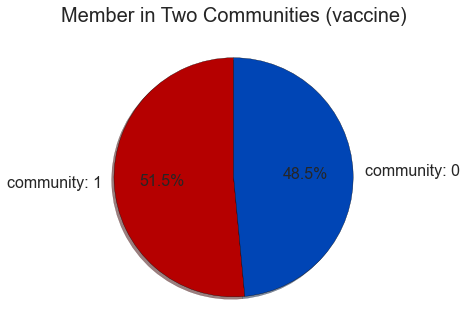

In [16]:
community_pie_chart(vax_g_v2, 'sentimentComm', 'Member in Two Communities (vaccine)')

D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

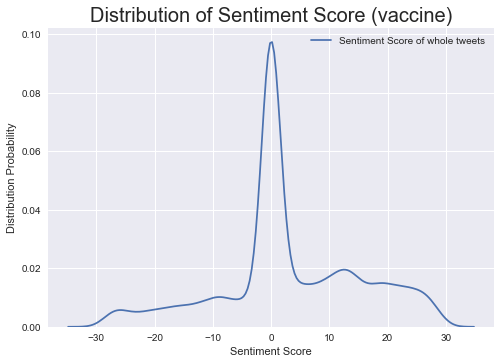

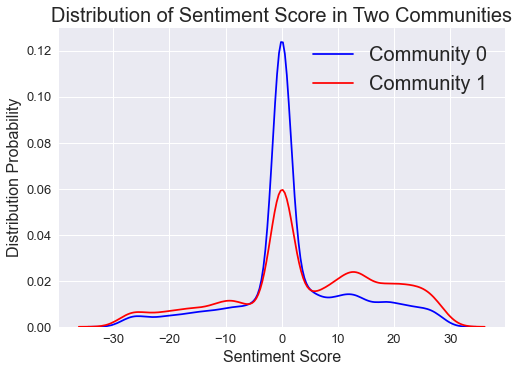

In [17]:
plot_sentiment_distribution1(vax_g_v2, 'Distribution of Sentiment Score (vaccine)', vax_df_v2)
plot_sentiment_distribution2(vax_g_v2, 'Distribution of Sentiment Score (vaccine)', vax_df_v2)

  0%|          | 0/25043 [00:00<?, ?it/s]

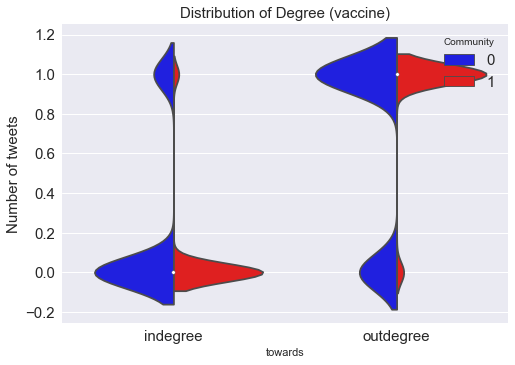

,degree_value,community,towards,placeholder
1,0.0,0,indegree,
2,0.0,1,outdegree,
5,0.0,1,indegree,
6,1.0,1,outdegree,
7,0.0,1,indegree,
...,...,...,...,...
50081,0.0,1,indegree,
50082,1.0,1,outdegree,
50083,0.0,1,indegree,
50084,1.0,1,outdegree,


In [18]:
plot_degree_distribution(vax_dig_v2, 'Distribution of Degree (vaccine)', 0)

In [19]:
vax_df_v2.to_csv('vax_df_reply_v2.csv')

# p1

In [20]:
vax_g_p1 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/p1/Final_Graph_sentiment_Vax.gml')
vax_dig_p1 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/p1/Final_DiGraph_sentiment_Vax.gml')

print(nx.info(vax_g_p1))
print('-------------------------------------------')
print(nx.info(vax_dig_p1))

Name: Final vax Graph
Type: Graph
Number of nodes: 402404
Number of edges: 589247
Average degree:   2.9286
-------------------------------------------
Name: Final vax Direct Graph
Type: DiGraph
Number of nodes: 402404
Number of edges: 594004
Average in degree:   1.4761
Average out degree:   1.4761


In [21]:
vax_df_p1 = create_graph_df(vax_g_p1)


  0%|          | 0/402404 [00:00<?, ?it/s]

In [22]:
comm_0_p1 = extract_community(vax_dig_p1, 0, 'sentimentComm')
comm_1_p1 = extract_community(vax_dig_p1, 1, 'sentimentComm')

compute_degree(comm_0_p1, 1)
compute_degree(comm_1_p1, 1)

Name: 
Type: MultiDiGraph
Number of nodes: 195333
Number of edges: 430276
Average in degree:   2.2028
Average out degree:   2.2028
Name: 
Type: MultiDiGraph
Number of nodes: 195333
Number of edges: 430276
Average in degree:   2.2028
Average out degree:   2.2028
degree: [('immuneresponseb', 0.01588065447545717), ('jlay02', 0.006394241598918765), ('jsaholmes', 0.0058771732230254135), ('minnesotaexpat', 0.005416419224704606), ('sureshseshadri1', 0.003670673519955768), ('mcfunny', 0.0034607744762762886), ('vickie627', 0.0031382466774517235), ('adamada13410588', 0.0030051399668257124), ('cathyby', 0.002810599389756927), ('mizque', 0.0027338070567034588)]
Name: 
Type: MultiDiGraph
Number of nodes: 207071
Number of edges: 353743
Average in degree:   1.7083
Average out degree:   1.7083
Name: 
Type: MultiDiGraph
Number of nodes: 207071
Number of edges: 353743
Average in degree:   1.7083
Average out degree:   1.7083
degree: [('nyc_vaccine', 0.0551359443666393), ('genbiousa', 0.004312551311150819

In [ ]:
compute_betweenness(comm_0_p1)
compute_betweenness(comm_1_p1)

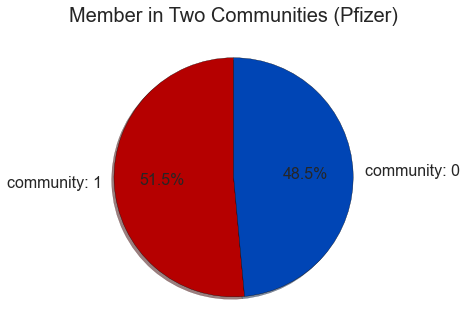

In [24]:
community_pie_chart(vax_g_p1, 'sentimentComm', 'Member in Two Communities (Pfizer)')

D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

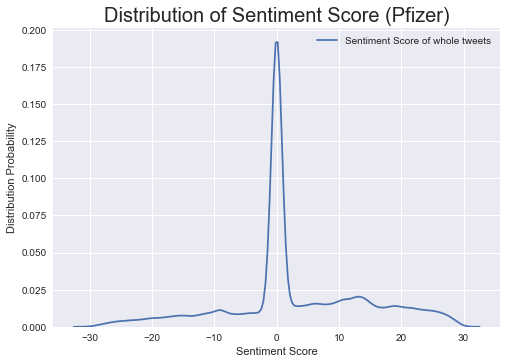

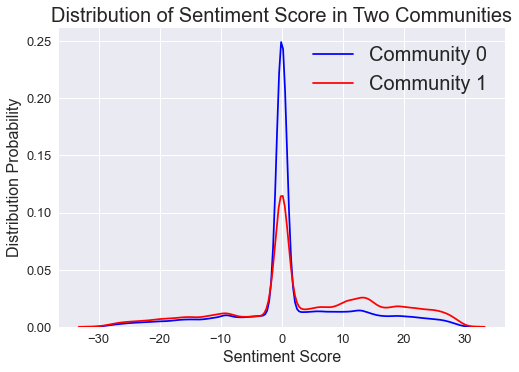

In [25]:
plot_sentiment_distribution1(vax_g_p1, 'Distribution of Sentiment Score (Pfizer)', vax_df_p1)
plot_sentiment_distribution2(vax_g_p1, 'Distribution of Sentiment Score (Pfizer)', vax_df_p1)

  0%|          | 0/402404 [00:00<?, ?it/s]

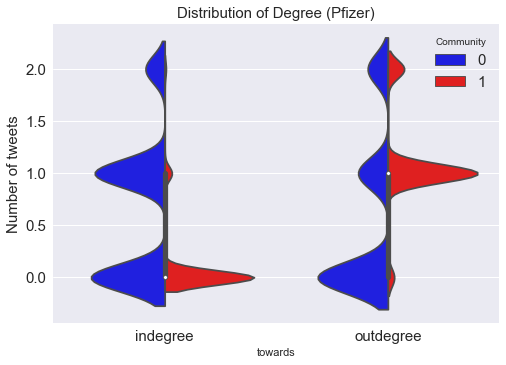

,degree_value,community,towards,placeholder
1,2.0,0,indegree,
2,2.0,0,outdegree,
3,1.0,0,indegree,
4,0.0,0,outdegree,
5,2.0,0,indegree,
...,...,...,...,...
804803,0.0,0,indegree,
804804,1.0,0,outdegree,
804805,0.0,0,indegree,
804806,0.0,0,outdegree,


In [26]:
plot_degree_distribution(vax_dig_p1, 'Distribution of Degree (Pfizer)', 0)

In [27]:
vax_df_p1.to_csv('vax_df_reply_p1.csv')

# p2

In [8]:
vax_g_p2 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/p2/Final_Graph_sentiment_Vax.gml')
vax_dig_p2 = nx.read_gml('D:/AAA_NUS/CS5344/data/graph_reply/p2/Final_DiGraph_sentiment_Vax.gml')

print(nx.info(vax_g_p2))
print('-------------------------------------------')
print(nx.info(vax_dig_p2))

Name: Final vax Graph
Type: Graph
Number of nodes: 187624
Number of edges: 272090
Average degree:   2.9004
-------------------------------------------
Name: Final vax Direct Graph
Type: DiGraph
Number of nodes: 187624
Number of edges: 276705
Average in degree:   1.4748
Average out degree:   1.4748


In [9]:
vax_df_p2 = create_graph_df(vax_g_p2)


  0%|          | 0/187624 [00:00<?, ?it/s]

In [32]:
comm_0_p2 = extract_community(vax_dig_p2, 0, 'sentimentComm')
comm_1_p2 = extract_community(vax_dig_p2, 1, 'sentimentComm')

compute_degree(comm_0_p2, 1)
compute_degree(comm_1_p2, 1)

Name: 
Type: MultiDiGraph
Number of nodes: 95321
Number of edges: 247627
Average in degree:   2.5978
Average out degree:   2.5978
Name: 
Type: MultiDiGraph
Number of nodes: 95321
Number of edges: 247627
Average in degree:   2.5978
Average out degree:   2.5978
degree: [('plhartungrn', 0.06801300881242131), ('mcfunny', 0.03423206042803189), ('f250roush', 0.03188208140998741), ('zeetubes', 0.0313365505665128), ('nomisinfotoday', 0.026395300041963908), ('willard1951', 0.02282836760386068), ('artyshouse', 0.02028955098615191), ('thecrystalbrian', 0.019555182543013007), ('ogilville1', 0.01760386067981536), ('kenneth72712993', 0.01660721779269828)]
Name: 
Type: MultiDiGraph
Number of nodes: 92303
Number of edges: 162601
Average in degree:   1.7616
Average out degree:   1.7616
Name: 
Type: MultiDiGraph
Number of nodes: 92303
Number of edges: 162601
Average in degree:   1.7616
Average out degree:   1.7616
degree: [('martinwesson3', 0.007865485038244024), ('cvaccinebot', 0.006933760915256441), (

In [ ]:
compute_betweenness(comm_0_p2)
compute_betweenness(comm_1_p2)

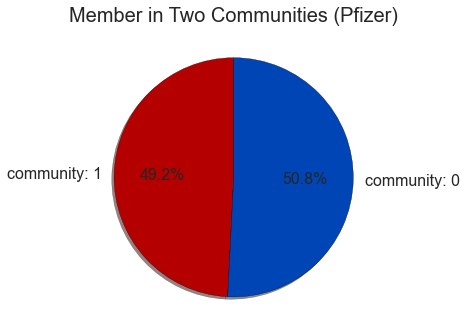

In [33]:
community_pie_chart(vax_g_p2, 'sentimentComm', 'Member in Two Communities (Pfizer)')

D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\cs5344\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

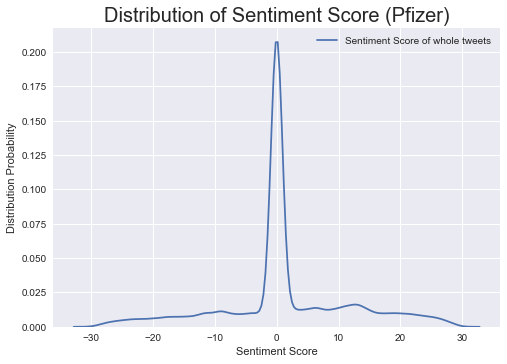

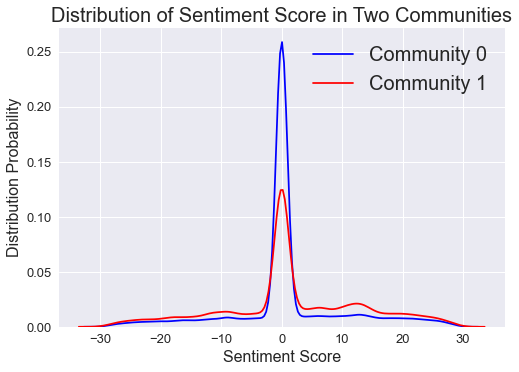

In [34]:
plot_sentiment_distribution1(vax_g_p2, 'Distribution of Sentiment Score (Pfizer)', vax_df_p2)
plot_sentiment_distribution2(vax_g_p2, 'Distribution of Sentiment Score (Pfizer)', vax_df_p2)

  0%|          | 0/187624 [00:00<?, ?it/s]

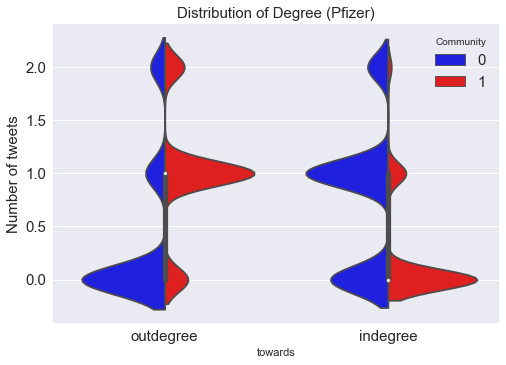

,degree_value,community,towards,placeholder
0,1.0,1,outdegree,
1,0.0,1,indegree,
2,2.0,1,outdegree,
5,1.0,1,indegree,
6,0.0,1,outdegree,
...,...,...,...,...
375243,0.0,0,indegree,
375244,1.0,1,outdegree,
375245,0.0,1,indegree,
375246,1.0,1,outdegree,


In [10]:
plot_degree_distribution(vax_dig_p2, 'Distribution of Degree (Pfizer)', 0)

In [11]:
vax_df_p2.to_csv('vax_df_reply_p2.csv')